# **SKIN DISEASE CLASSIFICATION**

Deep learning to predict the various skin diseases. The main objective of this project is to achieve maximum accuracy of skin disease prediction.
Deep learning techniques helps in detection of skin disease at an initial stage. The feature extraction plays a key role in classification of skin diseases.The usage of Deep Learning algorithms reduces the need for human labor, such as manual feature extraction and data reconstruction for classification purpose.
Moreover, Explainable AI is used to interpret the decisions made by our model.

## ABOUT THE DATASET

HAM10000 ("Human Against Machine with 10000 training images") dataset - a large collection of multi-source dermatoscopic images of pigmented lesions

The dermatoscopic images are collected from different populations, acquired and stored by different modalities. The final dataset consists of 10015 dermatoscopic images.

It has 7 different classes of skin cancer which are listed below :
- Melanocytic nevi
- Melanoma
- Benign keratosis-like lesions
- Basal cell carcinoma
- Actinic keratoses
- Vascular lesions
- Dermatofibroma


In [1]:
#Importing required libraries
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from glob import glob

HAM10000_metadata.csv file is the main csv file that includes the data of all training images, the features of which are -
 
1. Lesion_id
2. Image_id
3. Dx
4. Dx_type
5. Age
6. Sex
7. Localization


In [2]:
# Reading the data from HAM_metadata.csv
df = pd.read_csv(r'C:\Users\Saraswata\Documents\skin-cancer-mnsit-ham10000\HAM10000_metadata.csv')

In [3]:
df.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [4]:
df.dtypes

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

In [5]:
df.describe()

age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000

A general statistical analysis of the numerical values of dataset (here : age)

## **Data Cleaning**

### Removing NULL values and performing visualizations to gain insights of dataset: Univariate and Bivariate Analysis

In [6]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

The feature 'age' consists of 57 null records. Thus, we need to replace them with the mean of 'age' since dropping 57 records would lead to loss of data.

In [7]:
df['age'].fillna(int(df['age'].median()),inplace=True)

In [8]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

Now, the null values have been removed.

In [9]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
base_skin_dir = r'C:\Users\Saraswata\Documents\skin-cancer-mnsit-ham10000'

# Merge images from both folders into one dictionary

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

In [10]:
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                                path  \
0  C:\Users\Saraswata\Documents\skin-cancer-mnsit...   
1  C:\Users\Saraswata\Documents\skin-cancer-mnsit...   
2  C:\Users\Saraswata\Documents\skin-cancer-mnsit...   
3  C:\Users\Saraswata\Documents\skin-cancer-mnsit...   
4  C:\Users\Saraswata\Documents\skin-cancer-mnsit...   

                        cell_type  cell_type_idx  
0  Benign keratosis-like lesions               2  
1  Benign keratosis-like lesions               2  
2  Benign keratosis-like lesions               2  
3  Benign keratosis-like lesions               2  
4  Benign keratosis-like lesions               2

## **Image Preprocessing**

### Resizing of images because the original dimensions of 450 * 600 * 3 take long time to process in Neural Networks

In [11]:
df['img'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((125,100))))

Showcasing some samples of each class of the dataset in the images below:

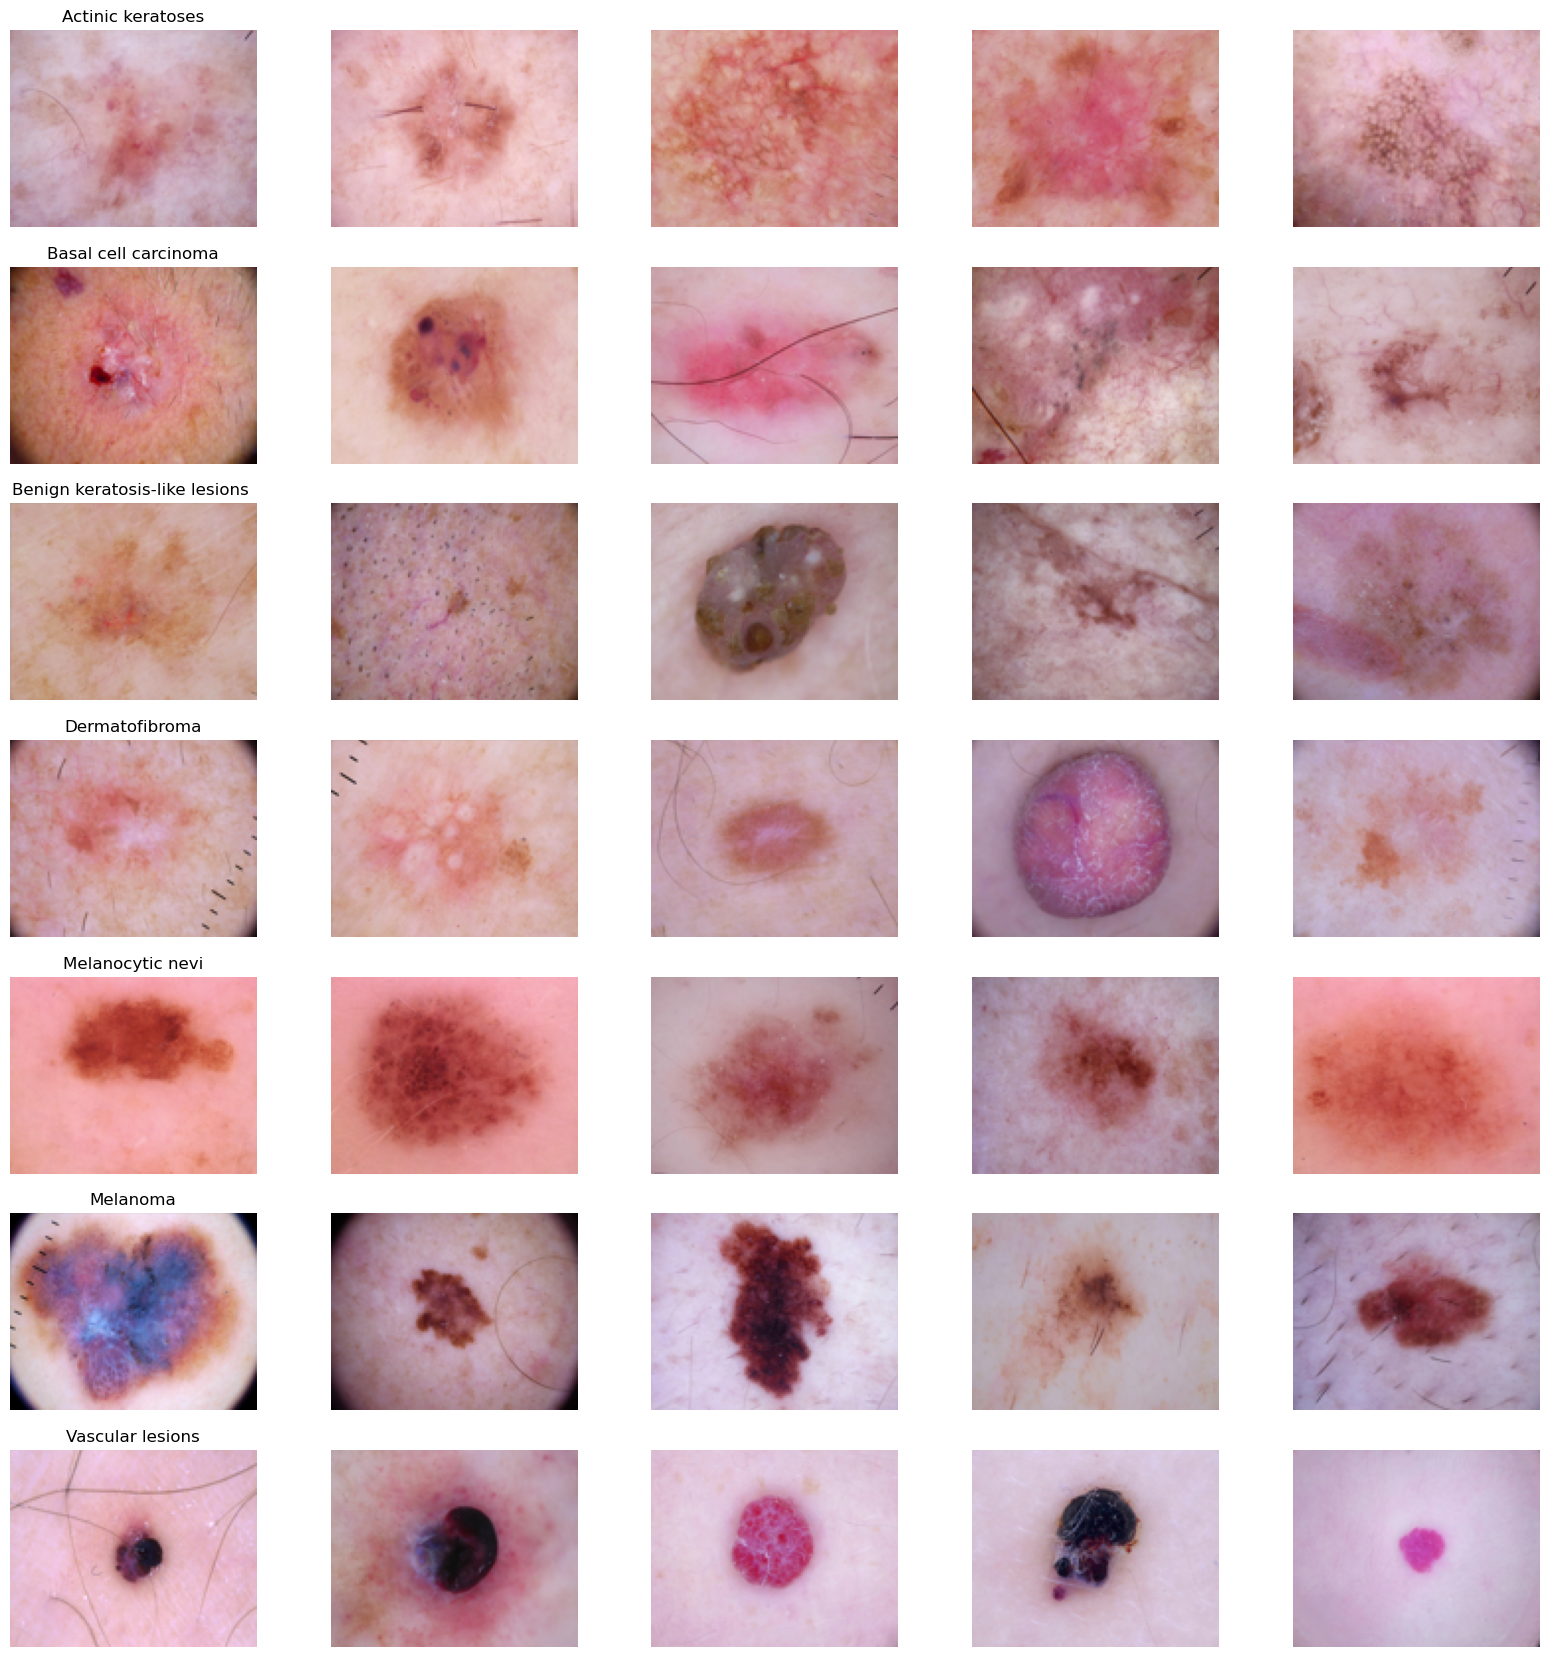

In [12]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['img'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [13]:
# See the image size distribution - should just return one row (all images are uniform)
df['img'].map(lambda x: x.shape).value_counts()

img
(100, 125, 3)    10015
Name: count, dtype: int64

In [14]:
import cv2
def dullrazor(img, lowbound=15, showimgs=True, filterstruc=3, inpaintmat=3):
    #grayscale
    imgtmp1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #applying a blackhat
    filterSize =(filterstruc, filterstruc)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize) 
    imgtmp2 = cv2.morphologyEx(imgtmp1, cv2.MORPH_BLACKHAT, kernel)

    #0=skin and 255=hair
    ret, mask = cv2.threshold(imgtmp2, lowbound, 255, cv2.THRESH_BINARY)
    
    #inpainting
    img_final = cv2.inpaint(img, mask, inpaintmat ,cv2.INPAINT_TELEA)
    
    return img_final

In [15]:
df['image'] = df['img'].apply(lambda x: dullrazor(x))

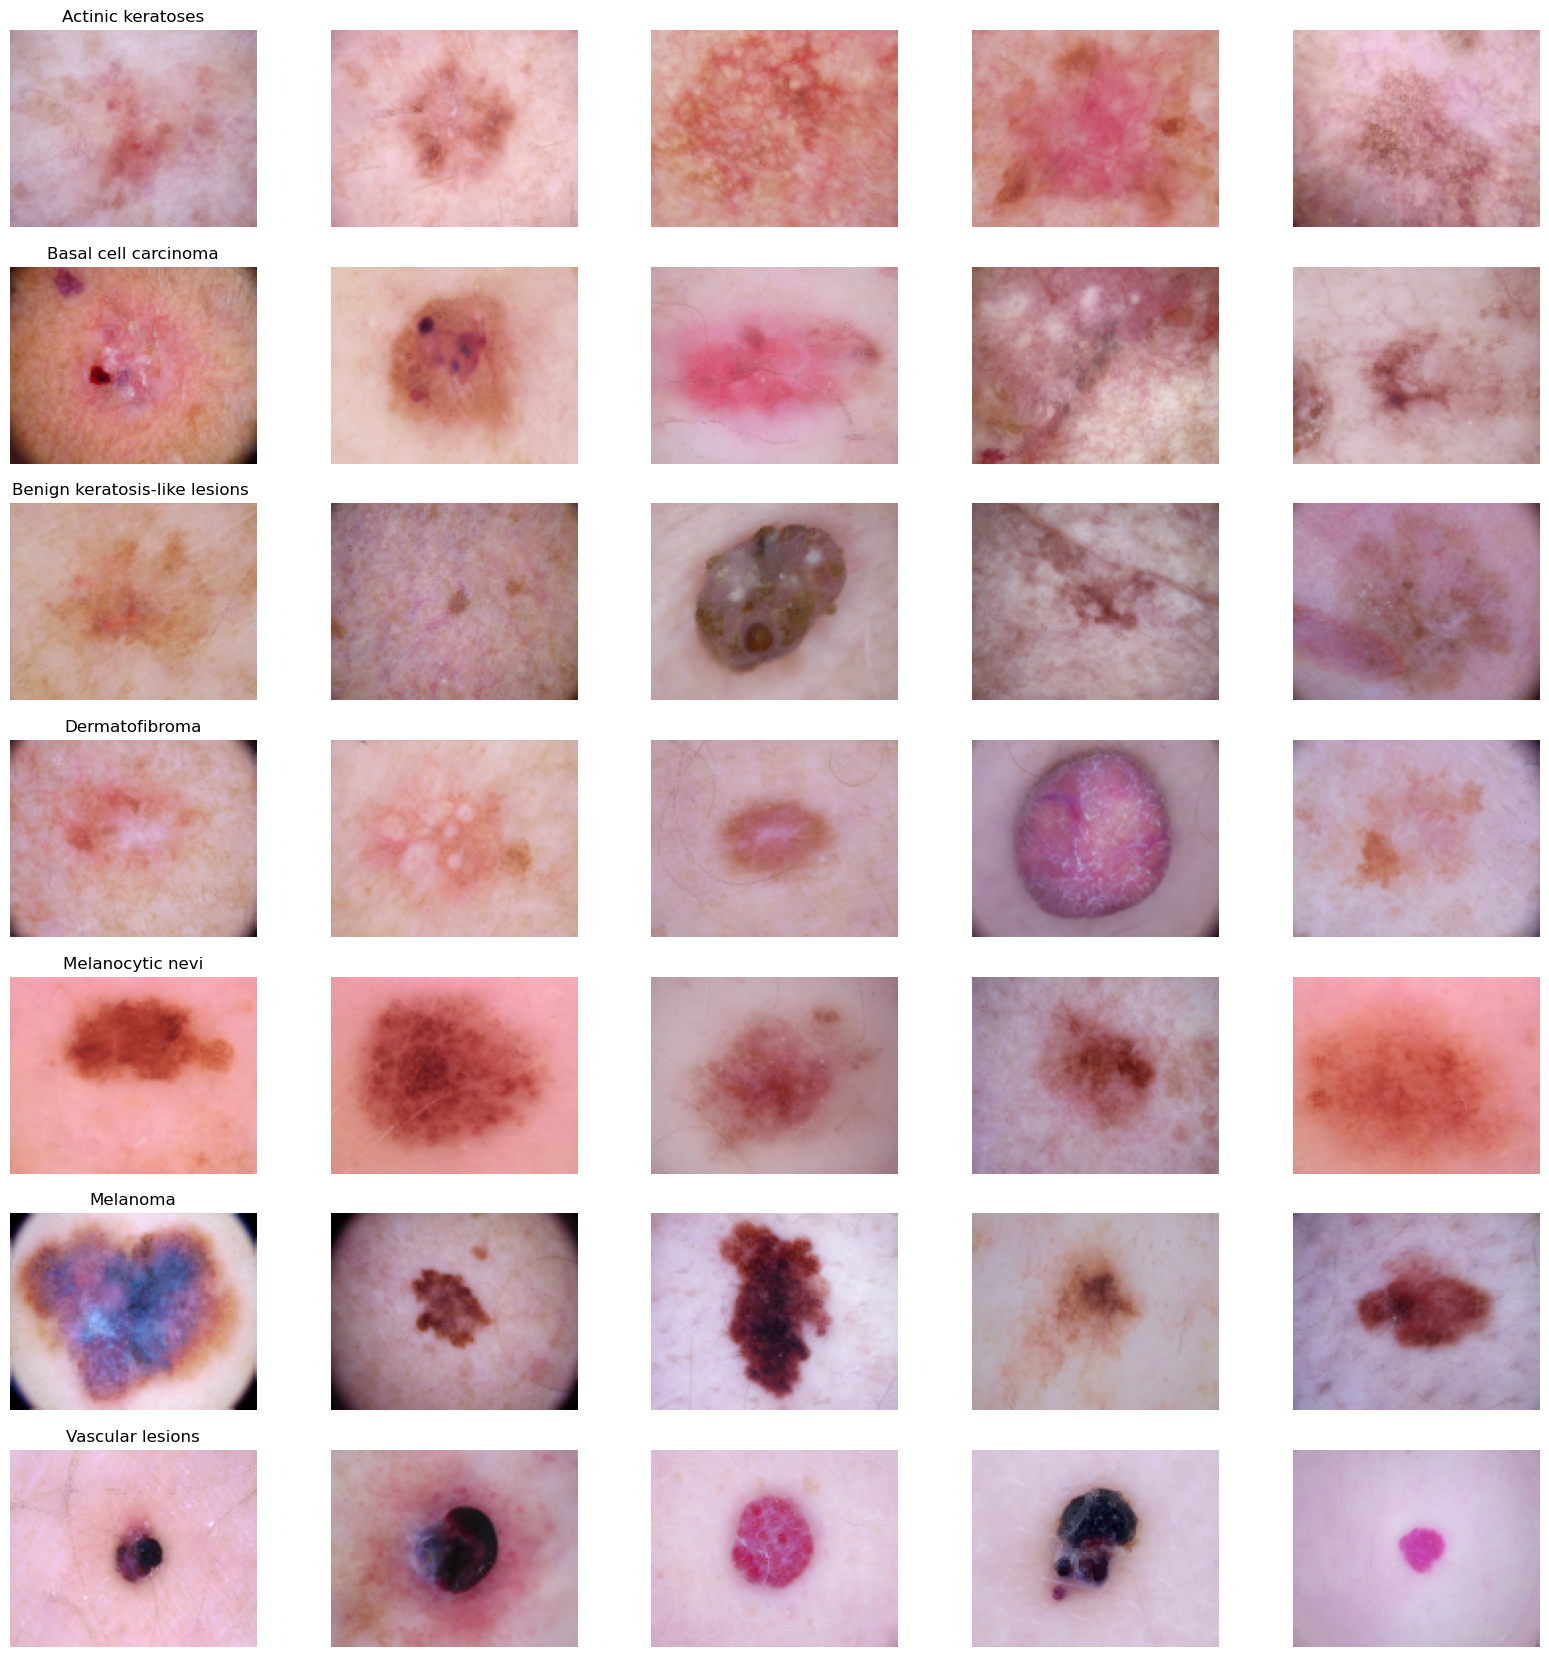

In [16]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples_dull.png', dpi=300)

## **Exploratory Data Analysis**

Exploratory data analysis can help detect obvious errors, identify outliers in datasets, understand relationships, unearth important factors, find patterns within data, and provide new insights.

In [17]:
df= df[df['age'] != 0]
df= df[df['sex'] != 'unknown']

### UNIVARIATE ANALYSIS

<Axes: title={'center': 'CELL TYPE'}, xlabel='cell_type', ylabel='Count'>

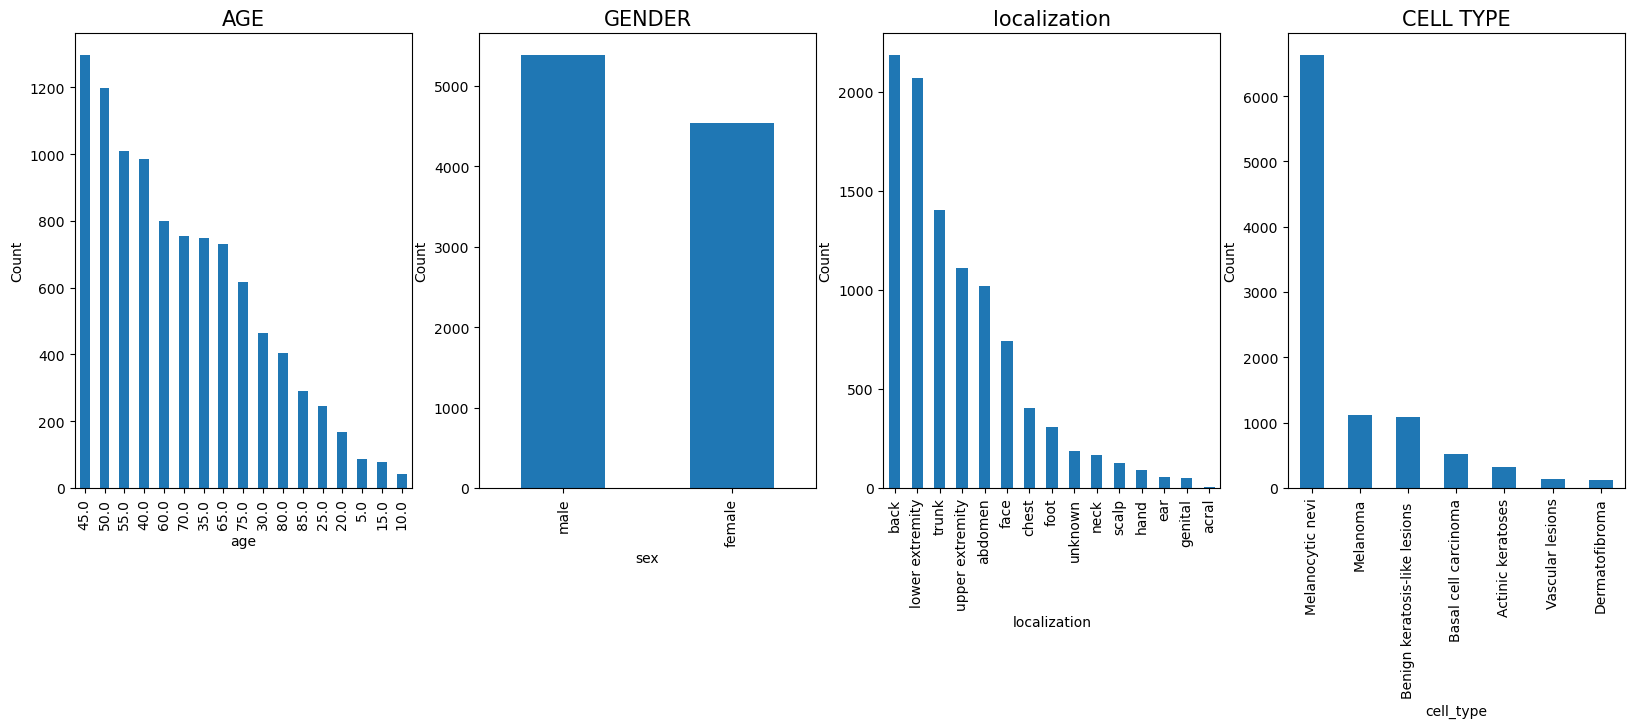

In [18]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)
plt.subplot(2,4,1)
plt.title("AGE",fontsize=15)
plt.ylabel("Count")
df['age'].value_counts().plot.bar()

plt.subplot(2,4,2)
plt.title("GENDER",fontsize=15)
plt.ylabel("Count")
df['sex'].value_counts().plot.bar()

plt.subplot(2,4,3)
plt.title("localization",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
df['localization'].value_counts().plot.bar()

plt.subplot(2,4,4)
plt.title("CELL TYPE",fontsize=15)
plt.ylabel("Count")
df['cell_type'].value_counts().plot.bar()

1. Skin diseases are found to be maximum in people aged around 45. Minimum for 10 and below. We also observe that the probability of having skin disease increases with the increase in age.
2. Skin diseases are more prominent in Men as compared to Women and other gender.
3. Skin diseases are more visible on the "back" of the body and least on the "acral surfaces"(such as limbs, fingers, or ears).
4. The most found disease among people is Melanocytic nevi while the least found is Dermatofibroma.

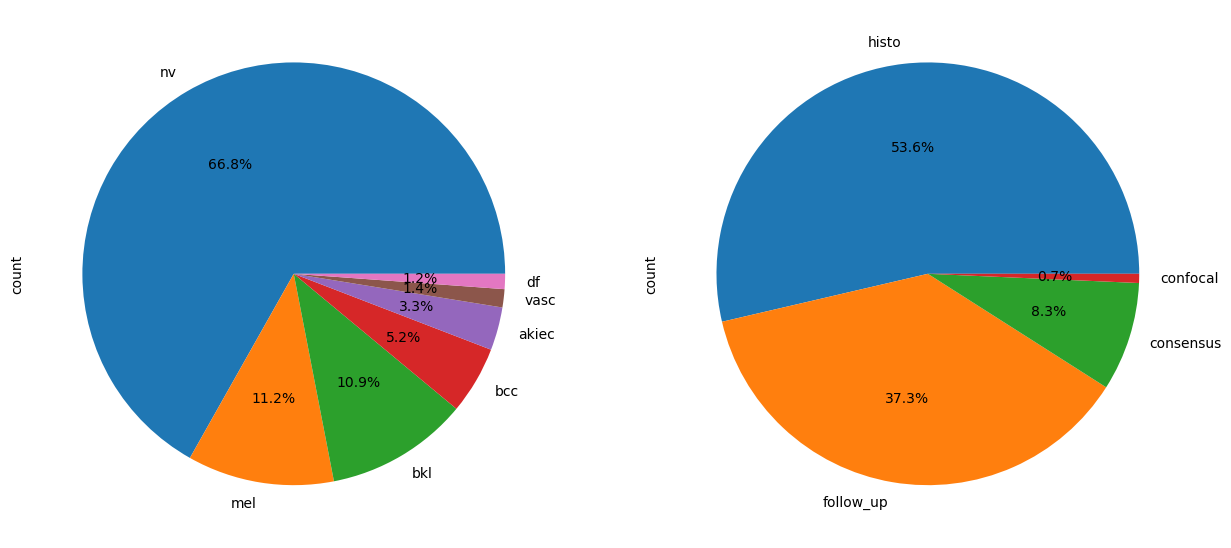

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
df['dx'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(1,2,2)
df['dx_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

1.  Type of skin disease:
    *     nv: Melanocytic nevi - 69.9%
    *     mel: Melanoma - 11.1 %
    *     bkl: Benign keratosis-like lesions - 11.0%
    *     bcc: Basal cell carcinoma - 5.1%
    *     akiec: Actinic keratoses- 3.3%
    *     vasc: Vascular lesions-1.4%
    *     df: Dermatofibroma - 1.1%

2. How the skin disease was discovered:
   * histo - histopathology - 53.3%
   * follow_up - follow up examination - 37.0%
   * consensus - expert consensus - 9.0%
   * confocal - confirmation by in-vivo confocal microscopy - 0.7%

### BIVARIATE ANALYSIS

<Axes: title={'center': 'LOCALIZATION VS GENDER'}, xlabel='count', ylabel='localization'>

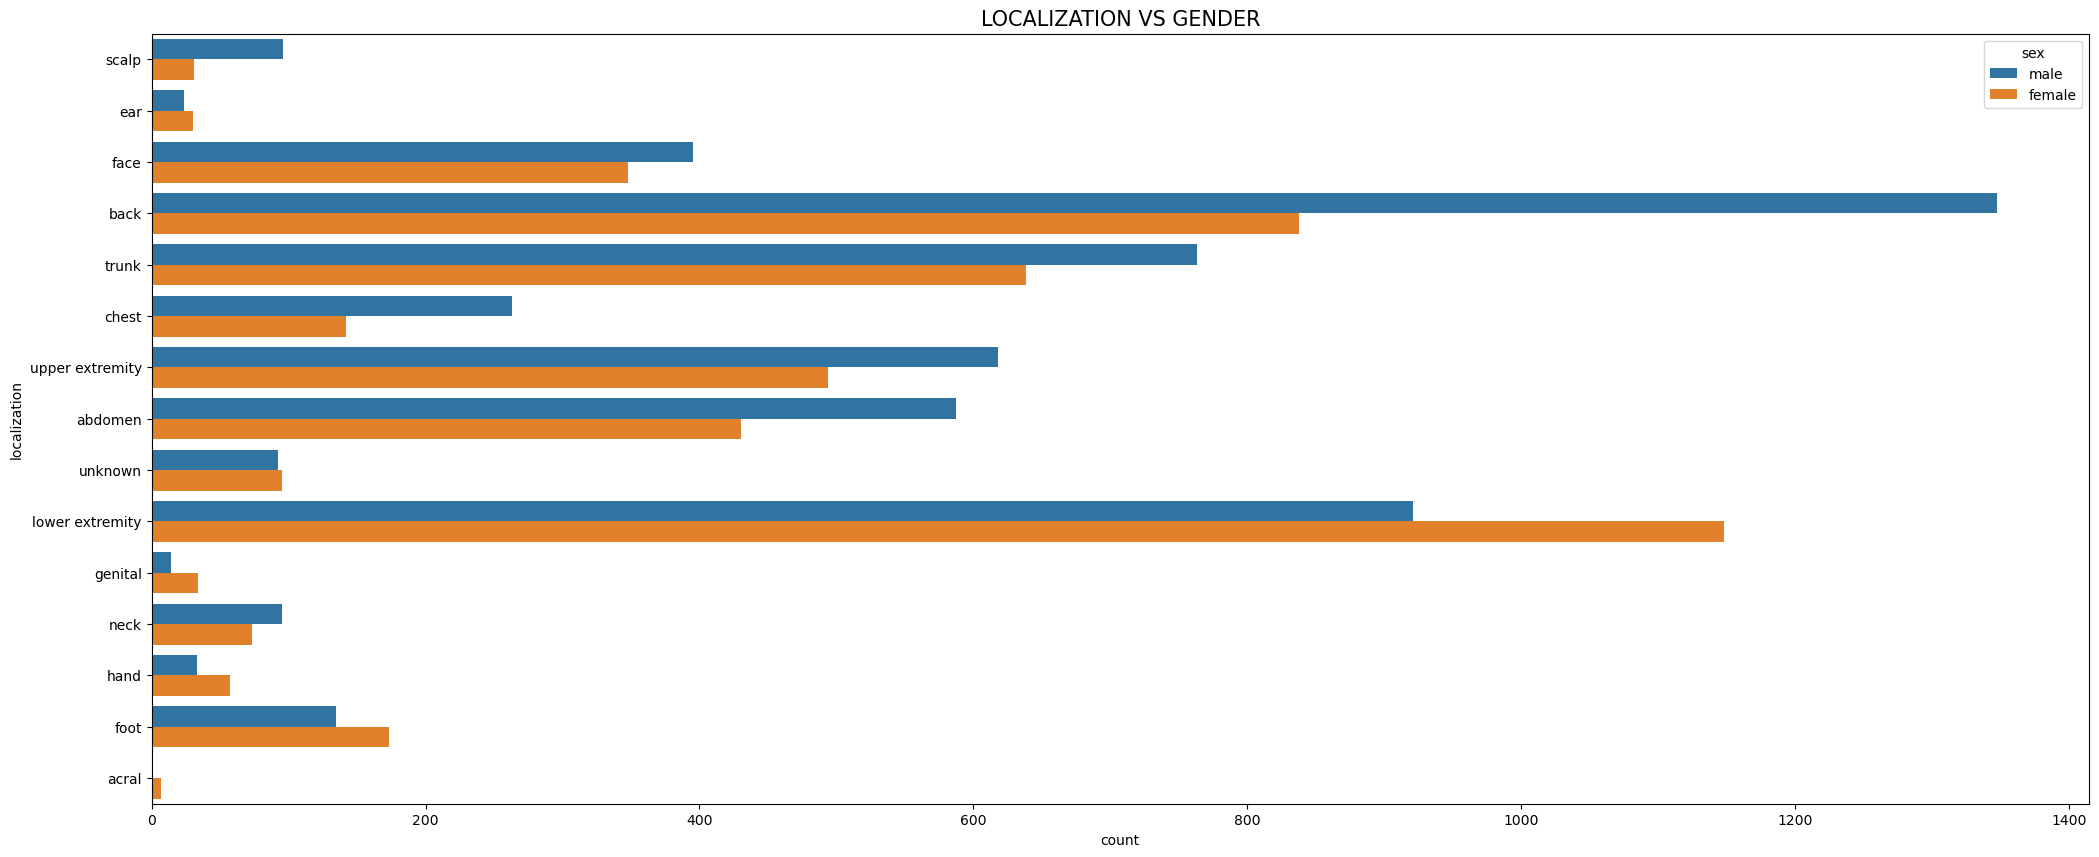

In [20]:
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS GENDER',fontsize = 15)
sns.countplot(y='localization', hue='sex',data=df)

* Back are is the most affected among people and more prominent in men.
* Infection on Lower extremity of the body is more visible in women.
* Some unknown regions also show infections and it's visible in men, women and other genders.
* The acral surfaces show the least infection cases that too in men only. Other gender groups don't show this kind of infection.


<Axes: title={'center': 'LOCALIZATION VS CELL TYPE'}, xlabel='count', ylabel='localization'>

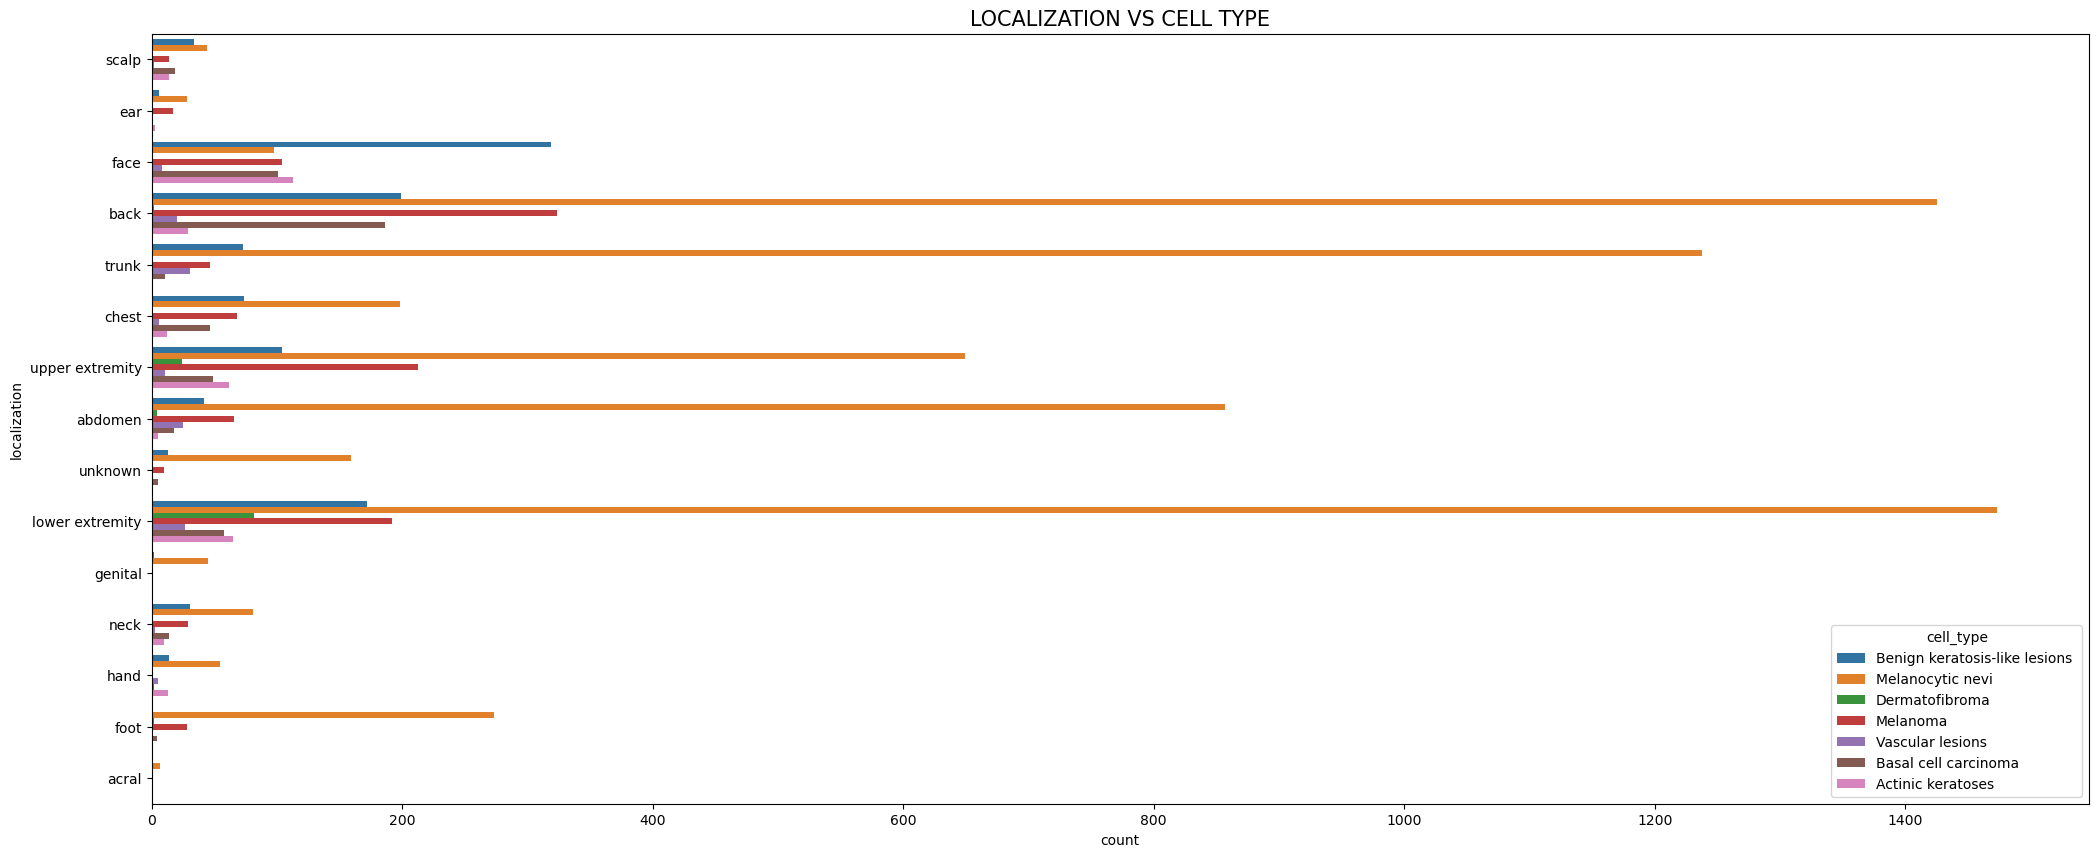

In [21]:
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS CELL TYPE',fontsize = 15)
sns.countplot(y='localization', hue='cell_type',data=df)

* The face is infected the most by Benign keratosis-like lesions.
* Body parts(except face) are infected the most by Melanocytic nevi.

<Axes: title={'center': 'GENDER VS CELL TYPE'}, xlabel='count', ylabel='sex'>

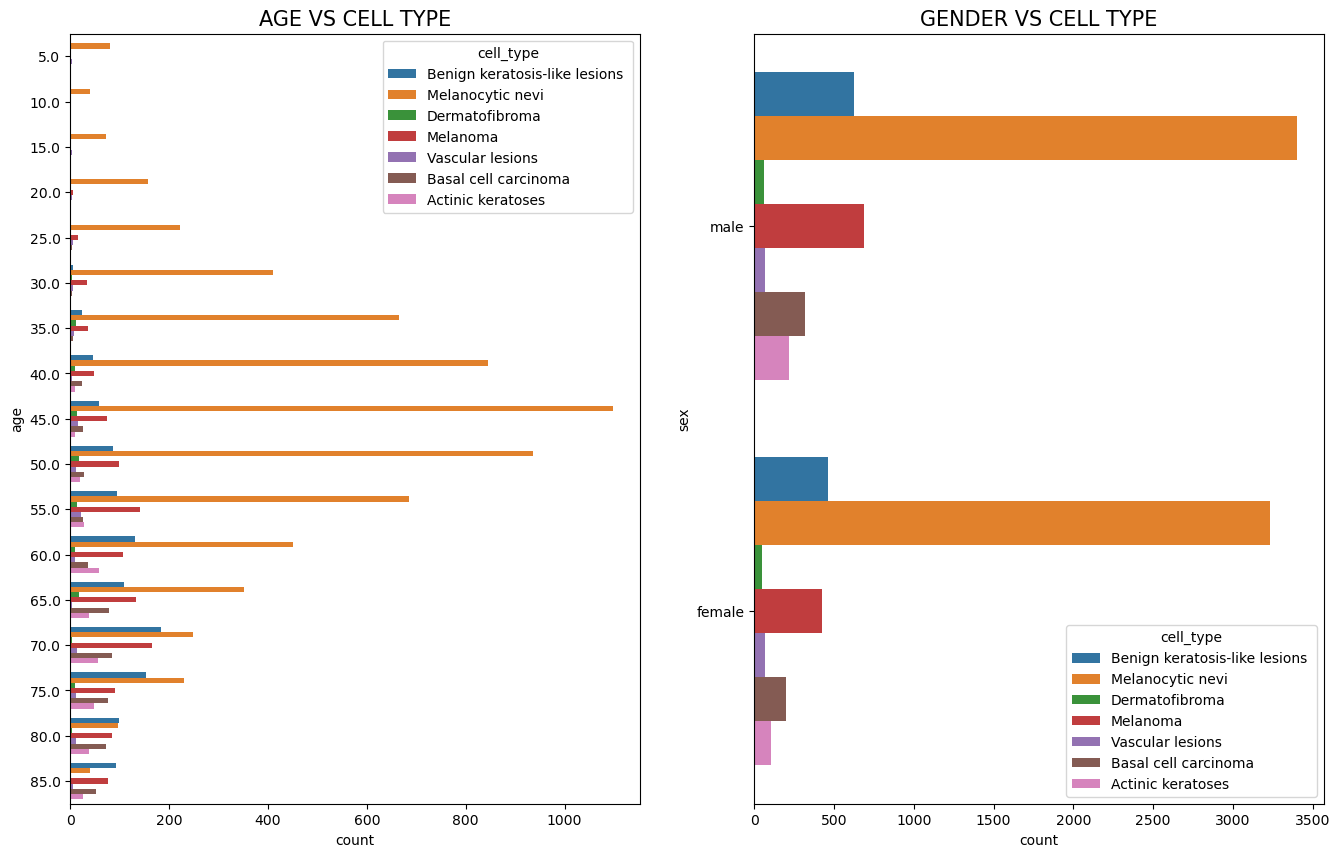

In [22]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('AGE VS CELL TYPE',fontsize = 15)
sns.countplot(y='age', hue='cell_type',data=df)
plt.subplot(132)
plt.title('GENDER VS CELL TYPE',fontsize = 15)
sns.countplot(y='sex', hue='cell_type',data=df)

1. The age group between 0-75 years is infected the most by Melanocytic nevi. On the other hand, the people aged 80-90 are affected more by Benign keratosis-like lesions.

2. All the gender groups are affected the most by Melanocytic nevi.

In [23]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [24]:
features=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']

In [25]:
features.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                                path  \
0  C:\Users\Saraswata\Documents\skin-cancer-mnsit...   
1  C:\Users\Saraswata\Documents\skin-cancer-mnsit...   
2  C:\Users\Saraswata\Documents\skin-cancer-mnsit...   
3  C:\Users\Saraswata\Documents\skin-cancer-mnsit...   
4  C:\Users\Saraswata\Documents\skin-cancer-mnsit...   

                        cell_type  \
0  Benign keratosis-like lesions    
1  Benign keratosis-like lesions    
2  Benign keratosis-like lesions    
3  Benign keratosis-like lesions    
4  Benign keratosis-like lesions    

                                                 img  \
0  [[[189, 152, 194], [192, 156, 198], [191, 154,...   
1  [[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2...   
2  [[[186, 127, 135], [189, 133, 145], [192, 135,...   
3  [[[24, 11, 17], [24, 11, 20], [30, 15, 25], [4...   
4  [[[131, 88, 110], [142, 97, 120], [152, 107, 1...   

                                               image  
0  [[[189, 152, 194], [192, 156, 198], [191, 154,...  
1  [[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2...  
2  [[[186, 127, 135], [189, 133, 145], [192, 135,...  
3  [[[24, 11, 17], [24, 11, 20], [30, 15, 25], [4...  
4  [[[153, 108, 133], [142, 97, 120], [152, 107, ...

In [26]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.25,random_state=666)
tf.unique(x_train_o.cell_type.values)

Unique(y=<tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'Melanocytic nevi', b'Basal cell carcinoma', b'Melanoma',
       b'Actinic keratoses', b'Vascular lesions',
       b'Benign keratosis-like lesions ', b'Dermatofibroma'], dtype=object)>, idx=<tf.Tensor: shape=(7440,), dtype=int32, numpy=array([0, 1, 2, ..., 1, 0, 0])>)

In [27]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [28]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [29]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)
# Reshape image in 3 dimensions (height = 100, width = 125 , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(100, 125, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 125, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 125, 3))

In [30]:
x_train = x_train.reshape(6696,125*100*3)
x_test = x_test.reshape(2481,125*100*3)
print(x_train.shape)
print(x_test.shape)

(6696, 37500)
(2481, 37500)


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [36]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)
# Reshape image in 3 dimensions (height = 100, width = 125 , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(100, 125, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 125, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 125, 3))
# With data augmentation to prevent overfitting 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train)

In [38]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense

In [39]:
xception = Xception(input_shape=(100, 125, 3), weights='imagenet', include_top=False)

# Freeze the layers in the Xception model (preventing them from being trained)
for layer in xception.layers:
    layer.trainable = False
 

In [40]:
x = Flatten()(xception.output)
output = Dense(7, activation='sigmoid')(x)  # Output layer with 7 units and 'sigmoid' activation

In [41]:
model_x = Model(inputs=xception.input, outputs=output)

# Compile the model
model_x.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model_x.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 125, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 49, 62, 32)           864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 49, 62, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 49, 62, 32)           0         ['block1_conv1_bn[0][0]'] 

                                                                                                  
 block4_sepconv2_act (Activ  (None, 12, 15, 728)          0         ['block4_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block4_sepconv2 (Separable  (None, 12, 15, 728)          536536    ['block4_sepconv2_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block4_sepconv2_bn (BatchN  (None, 12, 15, 728)          2912      ['block4_sepconv2[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 conv2d_2 

                                                                                                  
 block7_sepconv1 (Separable  (None, 6, 8, 728)            536536    ['block7_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block7_sepconv1_bn (BatchN  (None, 6, 8, 728)            2912      ['block7_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block7_sepconv2_act (Activ  (None, 6, 8, 728)            0         ['block7_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block7_se

 ormalization)                                                                                    
                                                                                                  
 add_7 (Add)                 (None, 6, 8, 728)            0         ['block9_sepconv3_bn[0][0]',  
                                                                     'add_6[0][0]']               
                                                                                                  
 block10_sepconv1_act (Acti  (None, 6, 8, 728)            0         ['add_7[0][0]']               
 vation)                                                                                          
                                                                                                  
 block10_sepconv1 (Separabl  (None, 6, 8, 728)            536536    ['block10_sepconv1_act[0][0]']
 eConv2D)                                                                                         
          

 block12_sepconv3_act (Acti  (None, 6, 8, 728)            0         ['block12_sepconv2_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 block12_sepconv3 (Separabl  (None, 6, 8, 728)            536536    ['block12_sepconv3_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 block12_sepconv3_bn (Batch  (None, 6, 8, 728)            2912      ['block12_sepconv3[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 add_10 (Add)                (None, 6, 8, 728)            0         ['block12_sepconv3_bn[0][0]', 
          

In [42]:
model_x.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['acc'])

In [43]:
# Define the number of epochs and batch size
epochs = 30
batch_size = 16

# Train the model
history = model_x.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_validate, y_validate),
    verbose=1
)


Epoch 1/30
377/377 [==============================] - 118s 298ms/step - loss: 2.2177 - acc: 0.6462 - val_loss: 2.3063 - val_acc: 0.6433
Epoch 2/30
377/377 [==============================] - 93s 248ms/step - loss: 1.7396 - acc: 0.7071 - val_loss: 3.4455 - val_acc: 0.6731
Epoch 3/30
377/377 [==============================] - 74s 196ms/step - loss: 1.4773 - acc: 0.7380 - val_loss: 2.7382 - val_acc: 0.6343
Epoch 4/30
377/377 [==============================] - 73s 193ms/step - loss: 1.3665 - acc: 0.7541 - val_loss: 2.6315 - val_acc: 0.6403
Epoch 5/30
377/377 [==============================] - 74s 195ms/step - loss: 1.2318 - acc: 0.7755 - val_loss: 2.7913 - val_acc: 0.5955
Epoch 6/30
377/377 [==============================] - 74s 195ms/step - loss: 1.0837 - acc: 0.7985 - val_loss: 2.4851 - val_acc: 0.6239
Epoch 7/30
377/377 [==============================] - 72s 191ms/step - loss: 1.1317 - acc: 0.7995 - val_loss: 3.3497 - val_acc: 0.6149
Epoch 8/30
377/377 [==============================] - 

In [44]:
loss, accuracy = model_x.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model_x.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model_x.save("model_x.h5")

21/21 [==============================] - 7s 317ms/step - loss: 4.7325 - acc: 0.6940
Validation: accuracy = 0.694030  ;  loss_v = 4.732460
Test: accuracy = 0.713019  ;  loss = 4.135631


C:\Users\Saraswata\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
accuracy=history.history['acc']
loss=history.history['loss']
val_accuracy=history.history['val_acc']
val_loss=history.history['val_loss']
epochs = range(len(accuracy))
epochs

range(0, 30)

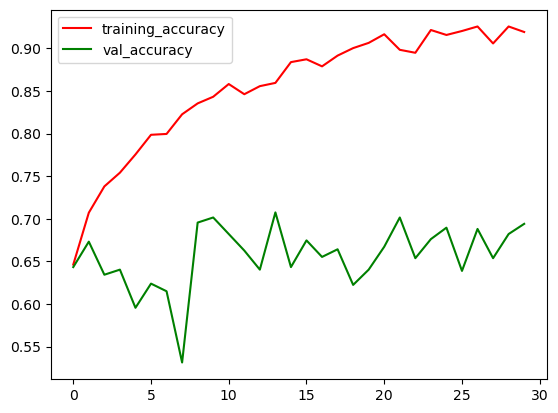

In [46]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy,'r',label='training_accuracy')
plt.plot(epochs,val_accuracy,'g',label='val_accuracy')
plt.legend()
plt.show()

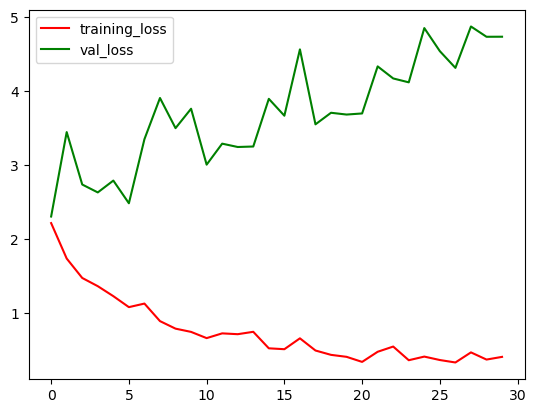

In [47]:
plt.plot(epochs,loss,'r',label='training_loss')
plt.plot(epochs,val_loss,'g',label='val_loss')
plt.legend()
plt.show()

21/21 [==============================] - 7s 328ms/step


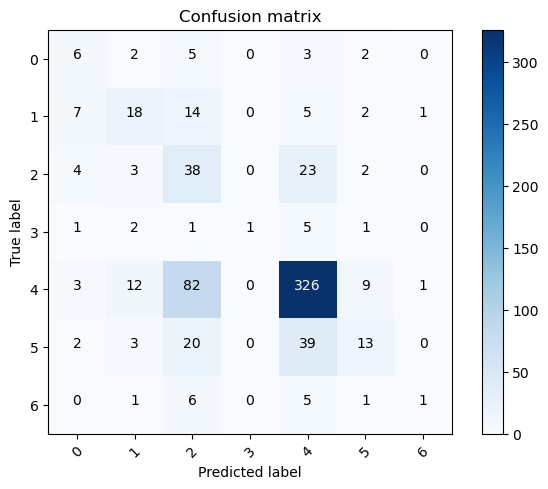

In [48]:
import itertools
from sklearn.metrics import classification_report,confusion_matrix
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model_x.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

78/78 [==============================] - 24s 312ms/step


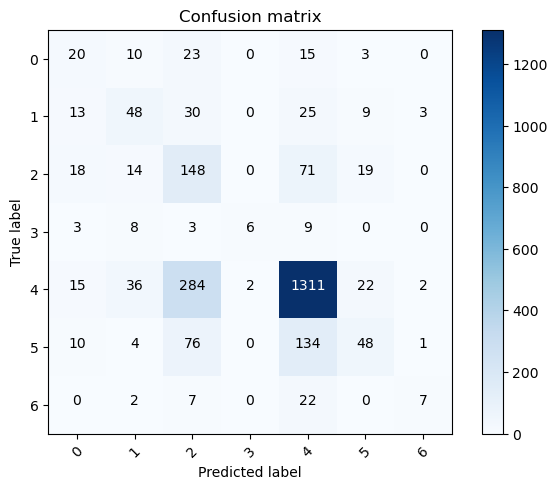

In [49]:
# Predict the values from the test dataset
Y_pred = model_x.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.25      0.28      0.27        71
           1       0.39      0.38      0.38       128
           2       0.26      0.55      0.35       270
           3       0.75      0.21      0.32        29
           4       0.83      0.78      0.80      1672
           5       0.48      0.18      0.26       273
           6       0.54      0.18      0.27        38

    accuracy                           0.64      2481
   macro avg       0.50      0.37      0.38      2481
weighted avg       0.68      0.64      0.64      2481



In [51]:
learning_graph={
    'loss': loss,
    'val_loss': val_loss,
    'train_accuracy': accuracy
}
df_lg=pd.DataFrame(learning_graph)
df_lg.head(30)

loss  val_loss  train_accuracy
0   2.217673  2.306315        0.646200
1   1.739578  3.445507        0.707103
2   1.477303  2.738156        0.737969
3   1.366476  2.631510        0.754066
4   1.231795  2.791277        0.775473
5   1.083695  2.485137        0.798540
6   1.131713  3.349734        0.799535
7   0.895071  3.905555        0.822602
8   0.793476  3.498757        0.835380
9   0.749656  3.760736        0.843180
10  0.665661  3.006237        0.858115
11  0.729759  3.289531        0.846167
12  0.718673  3.244397        0.855626
13  0.750800  3.250986        0.859442
14  0.528130  3.894252        0.883837
15  0.516092  3.666521        0.887156
16  0.662872  4.561461        0.878858
17  0.498534  3.550169        0.891470
18  0.439829  3.706255        0.900266
19  0.413205  3.682196        0.906406
20  0.344762  3.696990        0.916528
21  0.481438  4.332020        0.898274
22  0.551875  4.169302        0.894789
23  0.367468  4.116793        0.921507
24  0.416451  4.848866        0.915699
25  0.370051  4.537408        0.920345
26  0.337017  4.311856        0.925655
27  0.473170  4.870557        0.905742
28  0.376307  4.731611        0.925655
29  0.412645  4.732460        0.919184

In [52]:
# Define the number of epochs and batch size
epochs = 20
batch_size = 16

# Train the model
history = model_x.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_validate, y_validate),
    verbose=1
)


Epoch 1/20
377/377 [==============================] - 73s 195ms/step - loss: 0.4055 - acc: 0.9225 - val_loss: 6.0300 - val_acc: 0.7075
Epoch 2/20
377/377 [==============================] - 73s 193ms/step - loss: 0.2517 - acc: 0.9431 - val_loss: 5.7831 - val_acc: 0.5970
Epoch 3/20
377/377 [==============================] - 72s 192ms/step - loss: 0.3802 - acc: 0.9225 - val_loss: 4.9101 - val_acc: 0.7015
Epoch 4/20
377/377 [==============================] - 73s 194ms/step - loss: 0.2101 - acc: 0.9514 - val_loss: 4.7565 - val_acc: 0.6746
Epoch 5/20
377/377 [==============================] - 171s 454ms/step - loss: 0.2847 - acc: 0.9340 - val_loss: 5.1731 - val_acc: 0.6388
Epoch 6/20
377/377 [==============================] - 106s 281ms/step - loss: 0.2681 - acc: 0.9406 - val_loss: 5.2627 - val_acc: 0.6866
Epoch 7/20
377/377 [==============================] - 80s 211ms/step - loss: 0.3261 - acc: 0.9354 - val_loss: 5.1715 - val_acc: 0.6940
Epoch 8/20
377/377 [==============================] -

In [53]:
loss, accuracy = model_x.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model_x.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model_x.save("model_x_2.h5")

21/21 [==============================] - 7s 343ms/step - loss: 5.7479 - acc: 0.6567
Validation: accuracy = 0.656716  ;  loss_v = 5.747876
Test: accuracy = 0.690044  ;  loss = 5.055012


C:\Users\Saraswata\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
accuracy=history.history['acc']
loss=history.history['loss']
val_accuracy=history.history['val_acc']
val_loss=history.history['val_loss']
epochs = range(len(accuracy))
epochs

range(0, 20)

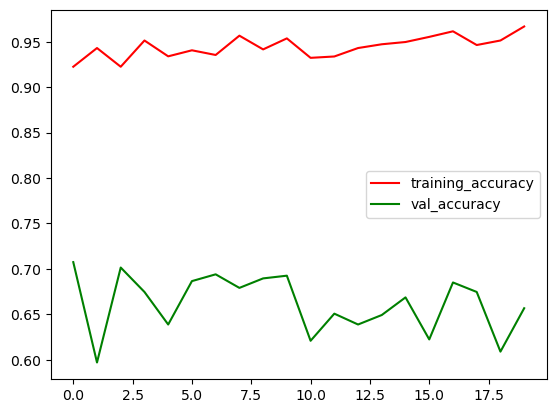

In [55]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy,'r',label='training_accuracy')
plt.plot(epochs,val_accuracy,'g',label='val_accuracy')
plt.legend()
plt.show()

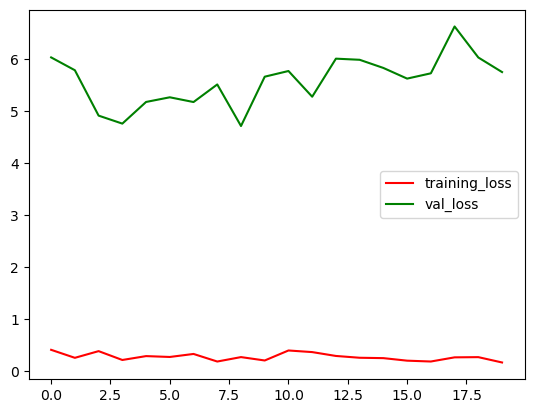

In [56]:
plt.plot(epochs,loss,'r',label='training_loss')
plt.plot(epochs,val_loss,'g',label='val_loss')
plt.legend()
plt.show()

21/21 [==============================] - 7s 348ms/step


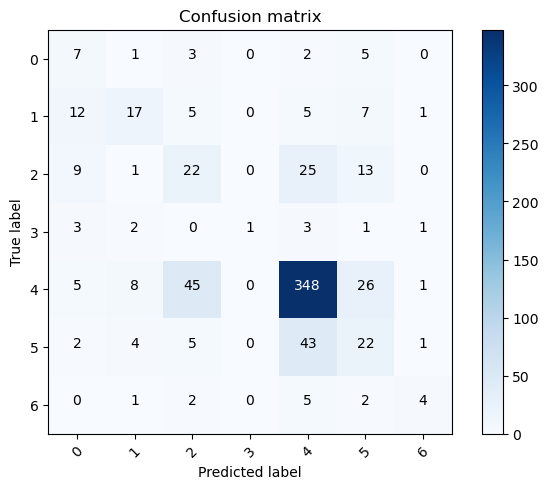

In [57]:
import itertools
from sklearn.metrics import classification_report,confusion_matrix
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model_x.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

78/78 [==============================] - 28s 360ms/step


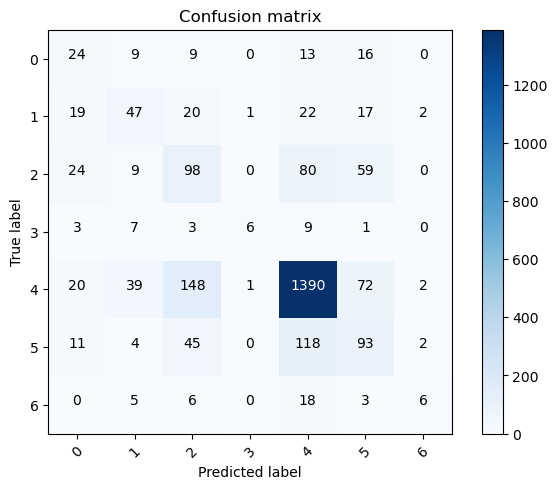

In [58]:
# Predict the values from the test dataset
Y_pred = model_x.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

In [59]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.24      0.34      0.28        71
           1       0.39      0.37      0.38       128
           2       0.30      0.36      0.33       270
           3       0.75      0.21      0.32        29
           4       0.84      0.83      0.84      1672
           5       0.36      0.34      0.35       273
           6       0.50      0.16      0.24        38

    accuracy                           0.67      2481
   macro avg       0.48      0.37      0.39      2481
weighted avg       0.68      0.67      0.67      2481



In [60]:
learning_graph={
    'loss': loss,
    'val_loss': val_loss,
    'train_accuracy': accuracy
}
df_lg=pd.DataFrame(learning_graph)
df_lg.head(30)

loss  val_loss  train_accuracy
0   0.405494  6.029958        0.922503
1   0.251653  5.783071        0.943080
2   0.380236  4.910120        0.922503
3   0.210123  4.756516        0.951377
4   0.284674  5.173104        0.933953
5   0.268113  5.262693        0.940591
6   0.326083  5.171489        0.935446
7   0.180347  5.509786        0.956688
8   0.265578  4.710234        0.941586
9   0.200480  5.659083        0.953701
10  0.392829  5.768435        0.932293
11  0.361865  5.273721        0.933787
12  0.287531  6.005871        0.943080
13  0.252804  5.984220        0.947229
14  0.245582  5.827065        0.949718
15  0.196893  5.622191        0.955360
16  0.180713  5.724027        0.961500
17  0.260730  6.624865        0.946399
18  0.264736  6.028387        0.951377
19  0.162086  5.747876        0.966810

In [61]:
# Define the number of epochs and batch size
epochs = 10
batch_size = 16

# Train the model
history = model_x.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_validate, y_validate),
    verbose=1
)


Epoch 1/10
377/377 [==============================] - 83s 220ms/step - loss: 0.2758 - acc: 0.9496 - val_loss: 6.1471 - val_acc: 0.6582
Epoch 2/10
377/377 [==============================] - 79s 210ms/step - loss: 0.3810 - acc: 0.9386 - val_loss: 6.2535 - val_acc: 0.6746
Epoch 3/10
377/377 [==============================] - 81s 215ms/step - loss: 0.2311 - acc: 0.9574 - val_loss: 7.0604 - val_acc: 0.6881
Epoch 4/10
377/377 [==============================] - 81s 214ms/step - loss: 0.2033 - acc: 0.9600 - val_loss: 6.0007 - val_acc: 0.6537
Epoch 5/10
377/377 [==============================] - 80s 213ms/step - loss: 0.2650 - acc: 0.9535 - val_loss: 6.5868 - val_acc: 0.6925
Epoch 6/10
377/377 [==============================] - 79s 211ms/step - loss: 0.1514 - acc: 0.9708 - val_loss: 6.5062 - val_acc: 0.6746
Epoch 7/10
377/377 [==============================] - 78s 208ms/step - loss: 0.2044 - acc: 0.9637 - val_loss: 6.8404 - val_acc: 0.6522
Epoch 8/10
377/377 [==============================] - 7

In [62]:
loss, accuracy = model_x.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model_x.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model_x.save("model_x_3.h5")

21/21 [==============================] - 7s 346ms/step - loss: 6.4999 - acc: 0.6701
Validation: accuracy = 0.670149  ;  loss_v = 6.499858
Test: accuracy = 0.703345  ;  loss = 5.722411


C:\Users\Saraswata\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
accuracy=history.history['acc']
loss=history.history['loss']
val_accuracy=history.history['val_acc']
val_loss=history.history['val_loss']
epochs = range(len(accuracy))
epochs

range(0, 10)

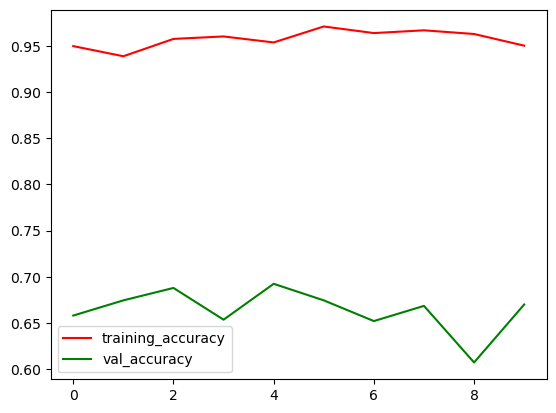

In [64]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy,'r',label='training_accuracy')
plt.plot(epochs,val_accuracy,'g',label='val_accuracy')
plt.legend()
plt.show()

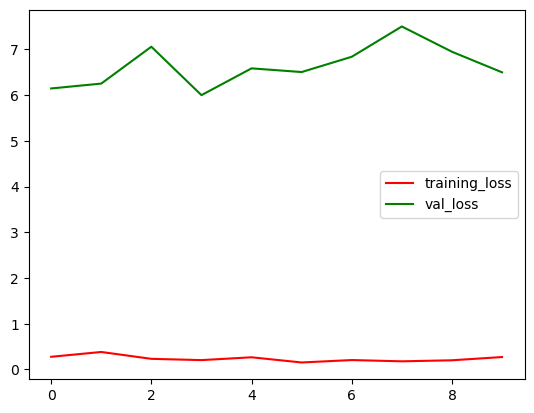

In [65]:
plt.plot(epochs,loss,'r',label='training_loss')
plt.plot(epochs,val_loss,'g',label='val_loss')
plt.legend()
plt.show()

21/21 [==============================] - 7s 346ms/step


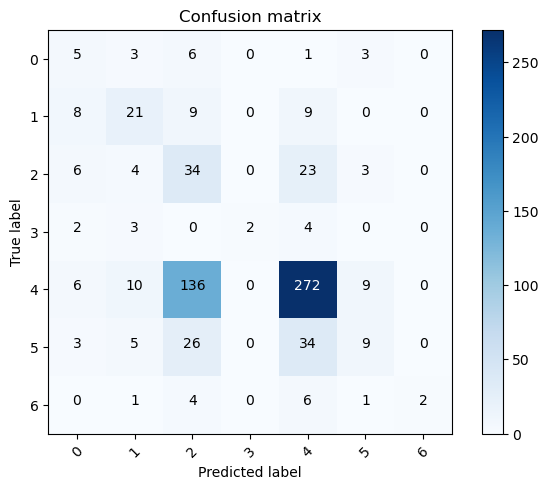

In [66]:
import itertools
from sklearn.metrics import classification_report,confusion_matrix
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model_x.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

78/78 [==============================] - 27s 344ms/step


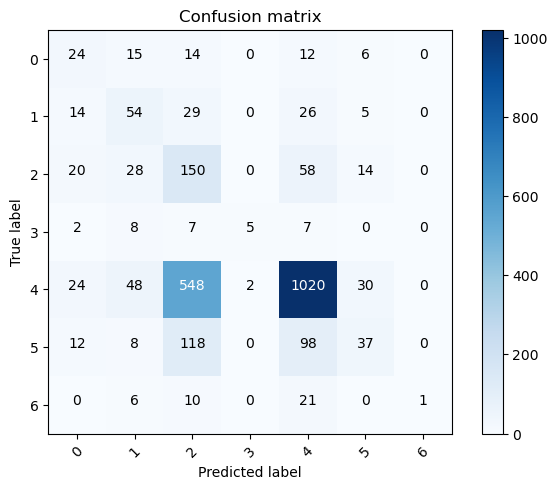

In [67]:
# Predict the values from the test dataset
Y_pred = model_x.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

In [68]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.25      0.34      0.29        71
           1       0.32      0.42      0.37       128
           2       0.17      0.56      0.26       270
           3       0.71      0.17      0.28        29
           4       0.82      0.61      0.70      1672
           5       0.40      0.14      0.20       273
           6       1.00      0.03      0.05        38

    accuracy                           0.52      2481
   macro avg       0.53      0.32      0.31      2481
weighted avg       0.66      0.52      0.55      2481



In [69]:
learning_graph={
    'loss': loss,
    'val_loss': val_loss,
    'train_accuracy': accuracy
}
df_lg=pd.DataFrame(learning_graph)
df_lg.head(30)

loss  val_loss  train_accuracy
0  0.275771  6.147096        0.949552
1  0.380958  6.253502        0.938599
2  0.231097  7.060355        0.957352
3  0.203264  6.000705        0.960007
4  0.265032  6.586808        0.953535
5  0.151404  6.506221        0.970793
6  0.204419  6.840390        0.963657
7  0.176777  7.503185        0.966645
8  0.199412  6.950252        0.962662
9  0.270429  6.499856        0.950050

In [70]:
# Define the number of epochs and batch size
epochs = 30
batch_size = 32

# Train the model
history = model_x.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_validate, y_validate),
    verbose=1
)


Epoch 1/30
189/189 [==============================] - 70s 371ms/step - loss: 0.0374 - acc: 0.9890 - val_loss: 5.7974 - val_acc: 0.6925
Epoch 2/30
189/189 [==============================] - 68s 358ms/step - loss: 0.0034 - acc: 0.9987 - val_loss: 5.8179 - val_acc: 0.6910
Epoch 3/30
189/189 [==============================] - 70s 372ms/step - loss: 0.0025 - acc: 0.9993 - val_loss: 5.7354 - val_acc: 0.6761
Epoch 4/30
189/189 [==============================] - 70s 372ms/step - loss: 0.0015 - acc: 0.9998 - val_loss: 5.8340 - val_acc: 0.6896
Epoch 5/30
189/189 [==============================] - 70s 371ms/step - loss: 6.0935e-04 - acc: 1.0000 - val_loss: 5.8026 - val_acc: 0.6851
Epoch 6/30
189/189 [==============================] - 71s 374ms/step - loss: 5.4869e-04 - acc: 1.0000 - val_loss: 5.8201 - val_acc: 0.6836
Epoch 7/30
189/189 [==============================] - 68s 359ms/step - loss: 4.8305e-04 - acc: 1.0000 - val_loss: 5.8167 - val_acc: 0.6866
Epoch 8/30
189/189 [=======================

In [72]:
loss, accuracy = model_x.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model_x.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model_x.save("model_x4.h5")

21/21 [==============================] - 7s 350ms/step - loss: 5.8150 - acc: 0.6896
Validation: accuracy = 0.689552  ;  loss_v = 5.814962
Test: accuracy = 0.718662  ;  loss = 5.217340


OSError: [Errno 22] Unable to create file (unable to open file: name = 'model_x4.h5', errno = 22, error message = 'Invalid argument', flags = 13, o_flags = 302)

In [73]:
accuracy=history.history['acc']
loss=history.history['loss']
val_accuracy=history.history['val_acc']
val_loss=history.history['val_loss']
epochs = range(len(accuracy))
epochs

range(0, 30)

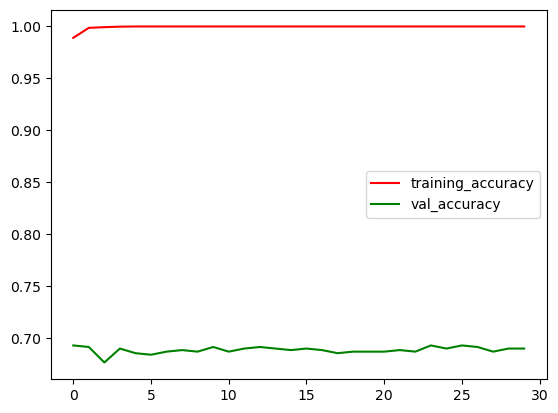

In [74]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy,'r',label='training_accuracy')
plt.plot(epochs,val_accuracy,'g',label='val_accuracy')
plt.legend()
plt.show()

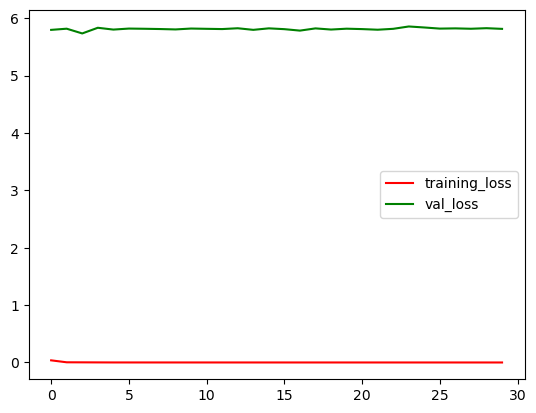

In [75]:
plt.plot(epochs,loss,'r',label='training_loss')
plt.plot(epochs,val_loss,'g',label='val_loss')
plt.legend()
plt.show()

21/21 [==============================] - 7s 340ms/step


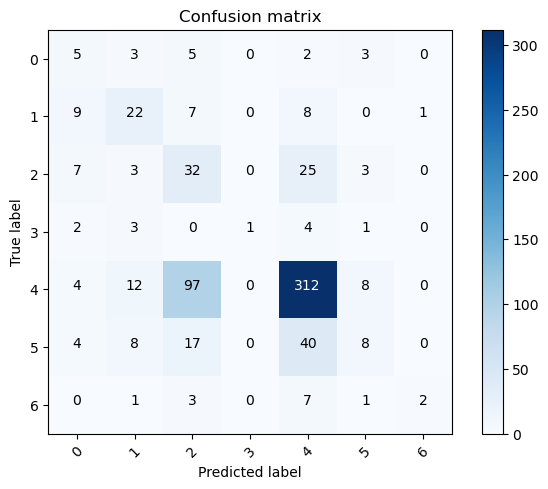

In [76]:
import itertools
from sklearn.metrics import classification_report,confusion_matrix
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model_x.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

78/78 [==============================] - 27s 351ms/step


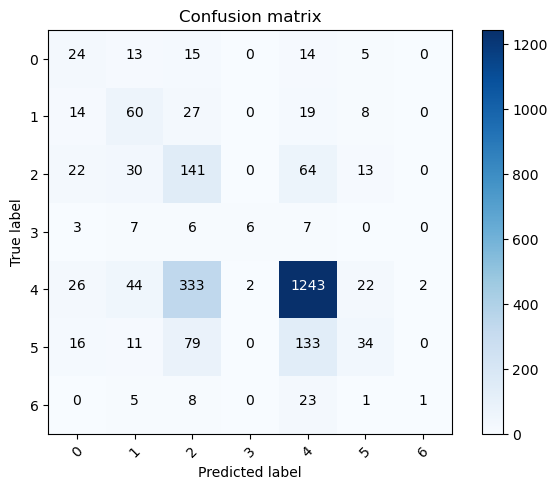

In [77]:
# Predict the values from the test dataset
Y_pred = model_x.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

In [78]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.23      0.34      0.27        71
           1       0.35      0.47      0.40       128
           2       0.23      0.52      0.32       270
           3       0.75      0.21      0.32        29
           4       0.83      0.74      0.78      1672
           5       0.41      0.12      0.19       273
           6       0.33      0.03      0.05        38

    accuracy                           0.61      2481
   macro avg       0.45      0.35      0.33      2481
weighted avg       0.67      0.61      0.62      2481



In [79]:
learning_graph={
    'loss': loss,
    'val_loss': val_loss,
    'train_accuracy': accuracy
}
df_lg=pd.DataFrame(learning_graph)
df_lg.head(30)

loss  val_loss  train_accuracy
0   0.037368  5.797430        0.989047
1   0.003366  5.817922        0.998672
2   0.002480  5.735374        0.999336
3   0.001491  5.834010        0.999834
4   0.000609  5.802575        1.000000
5   0.000549  5.820096        1.000000
6   0.000483  5.816667        1.000000
7   0.000461  5.812025        1.000000
8   0.000444  5.805280        1.000000
9   0.000405  5.820580        1.000000
10  0.000384  5.815830        1.000000
11  0.000367  5.811552        1.000000
12  0.000352  5.825591        1.000000
13  0.000334  5.797941        1.000000
14  0.000321  5.823980        1.000000
15  0.000311  5.809929        1.000000
16  0.000293  5.784630        1.000000
17  0.000281  5.823227        1.000000
18  0.000275  5.803211        1.000000
19  0.000258  5.818012        1.000000
20  0.000247  5.811019        1.000000
21  0.000247  5.800189        1.000000
22  0.000234  5.815821        1.000000
23  0.000214  5.856655        1.000000
24  0.000215  5.839221        1.000000
25  0.000204  5.819545        1.000000
26  0.000194  5.823493        1.000000
27  0.000184  5.816942        1.000000
28  0.000173  5.826875        1.000000
29  0.000168  5.814962        1.000000

In [ ]:
# Define the number of epochs and batch size
epochs = 30
batch_size = 8

# Train the model
history = model_x.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_validate, y_validate),
    verbose=1
)
